# Exploratory Notebook

# Business Understanding

## Business Context
Our company is entering the competitive movie production industry by establishing a new movie studio. With major corporations increasingly investing in original video content, we need to strategically position ourselves to maximize our chances of box office success.

## Primary Stakeholder
**Head of New Movie Studio** - The key decision-maker who will use our analysis to guide the studio's content creation strategy and investment decisions.

## Key Business Questions

### 1. **What genres are most profitable?**
   - Which movie genres consistently generate the highest box office returns?
   - Are there emerging genres showing strong growth potential?

### 2. **What budget ranges optimize ROI?**
   - What is the relationship between production budget and box office performance?
   - What budget sweet spot maximizes return on investment?

### 3. **When should we release our films?**
   - Which months/seasons show the strongest box office performance?
   - How can we avoid oversaturated release periods?

## Business Objectives
- **Primary Goal:** Identify the most profitable film characteristics to guide our initial movie productions
- **Success Metrics:** Maximize box office revenue and return on investment
- **Risk Mitigation:** Minimize financial losses by avoiding poorly-performing film categories

## Data Requirements & Analysis Considerations

### Dataset Specifications Needed:
1. **What movie data do we have access to?** (Box office numbers, budgets, genres, release dates, ratings, etc.)
2. **What time period does our data cover?** (Recent years only, or historical data?)
3. **Is it domestic box office, international, or worldwide gross?**

### Business Context Clarifications:
4. **What size studio are we targeting?** (Independent/small budget vs. major studio competitor?)
5. **Are there any genre restrictions?** (Family-friendly only, or open to all ratings?)
6. **Geographic focus?** (Domestic US market, international, or global?)

### Analysis Scope Considerations:
7. **Should we consider streaming/digital revenue or just theatrical box office?**
8. **Do we want to analyze competitor studios' strategies?**
9. **Should seasonal trends consider COVID-19 impact on recent years?**

## Success Metrics Framework
**Primary Metrics:**
- **Gross Revenue:** Total box office performance
- **Return on Investment (ROI):** (Revenue - Budget) / Budget × 100
- **Profit Margins:** Net profit as percentage of revenue
- **Budget Efficiency:** Revenue per dollar invested

**Secondary Metrics:**
- **Market Share:** Performance relative to industry
- **Risk Assessment:** Variance in returns by category
- **Audience Reach:** Ticket sales and demographic penetration

## Recommended Visualizations Strategy

### 1. **Genre Analysis**
- **Horizontal Bar Chart:** Average revenue by genre (easy comparison)
- **Box Plot:** Revenue distribution by genre (shows variability and outliers)
- **Scatter Plot:** Budget vs. Revenue by genre (profitability insights)

### 2. **Budget Optimization**
- **Scatter Plot with Trend Line:** Budget vs. ROI (sweet spot identification)
- **Histogram:** Distribution of profitable budget ranges
- **Bubble Chart:** Budget vs. Revenue (bubble size = profit margin)

### 3. **Release Timing**
- **Line Graph:** Monthly box office performance over time
- **Heatmap:** Revenue by month and genre combination
- **Seasonal Bar Chart:** Quarterly performance comparison

### 4. **Risk vs. Reward Analysis**
- **Risk-Return Scatter Plot:** Average return vs. standard deviation by category
- **Waterfall Chart:** Success rate breakdown by film characteristics

## Expected Deliverables
Three concrete, data-driven recommendations that the Head of Movie Studio can immediately implement in the studio's content strategy and production planning.

In [1]:
#importing relevant libs
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from random import gauss
from scipy import stats
import seaborn as sns
from sklearn.linear_model import LinearRegression
from mpl_toolkits import mplot3d
import sklearn.metrics as metrics
import statsmodels.api as sm
import sqlite3


## Loading the Data sets

In [2]:
#going through SQl
def load_tables(connection):
    table_names = pd.read_sql(
        "SELECT name FROM sqlite_master WHERE type='table';", connection
    )["name"].tolist()
    sql_tables = {
        table_name: pd.read_sql(f"SELECT * FROM {table_name}", connection)
        for table_name in table_names
    }
    return sql_tables

path = '../Data/im.db'
conn = sqlite3.connect(path)

imdb_tables = load_tables(conn)

print(imdb_tables.keys())


dict_keys(['movie_basics', 'directors', 'known_for', 'movie_akas', 'movie_ratings', 'persons', 'principals', 'writers'])


In [3]:
bom_movie = pd.read_csv("../Data/bom.movie_gross.csv")
rt_info = pd.read_csv("../Data/rt.movie_info.tsv", sep='\t', encoding='latin1')
rt_reviews = pd.read_csv("../Data/rt.movie_info.tsv", sep='\t', encoding='latin1')
tmdb_df = pd.read_csv("../Data/tmdb.movies.csv")
tn_budget = pd.read_csv("../Data/tn.movie_budgets.csv")

## SQL CLEANING AND MERGING

In [4]:
movie_basics = imdb_tables['movie_basics']
movie_basics.shape
movie_basics.head()
movie_basics.info()
movie_basics.describe()
print(movie_basics.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB
movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64


In [5]:
movie_basics_cp = movie_basics.copy(deep=True)

movie_basics_cp['original_title'] = movie_basics_cp['original_title'].fillna('Unknown')

movie_basics_median = movie_basics_cp['runtime_minutes'].median()

movie_basics_cp['runtime_minutes'] = movie_basics_cp['runtime_minutes'].fillna(movie_basics_median)

movie_basics_cp['genres'] = movie_basics_cp['genres'].fillna("Unknown")

In [6]:
print(movie_basics_cp.isna().sum())
movie_basics_cp.shape

movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
dtype: int64


(146144, 6)

In [7]:
movie_basics_cp['start_year'].unique()

array([2013, 2019, 2018, 2017, 2012, 2010, 2011, 2015, 2021, 2016, 2014,
       2020, 2022, 2023, 2024, 2026, 2025, 2115, 2027], dtype=int64)

<Axes: xlabel='start_year'>

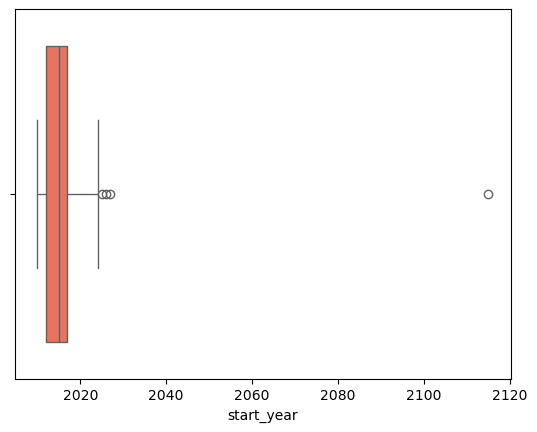

In [8]:
sns.boxplot(x= movie_basics_cp['start_year'], color='tomato')

In [9]:
movie_basics_cp = movie_basics_cp[movie_basics_cp['start_year'] < 2025]
movie_basics_cp.shape



(146140, 6)

<Axes: xlabel='runtime_minutes'>

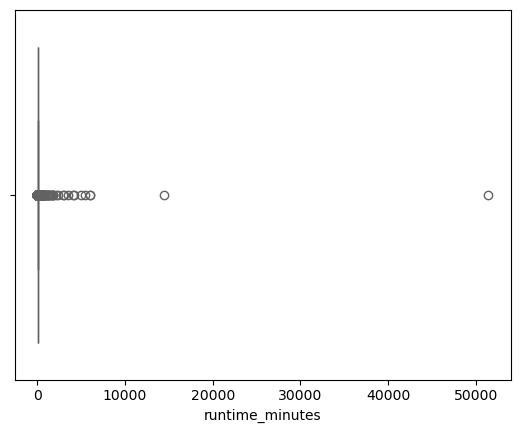

In [10]:
sns.boxplot(x= movie_basics_cp['runtime_minutes'], color='tomato')

In [11]:
runtime = movie_basics_cp['runtime_minutes'].sort_values(ascending=True)
runtime


95787         1.0
113278        1.0
93214         1.0
72190         1.0
98755         1.0
           ...   
88717      5460.0
87264      6000.0
123467     6017.0
44840     14400.0
132389    51420.0
Name: runtime_minutes, Length: 146140, dtype: float64

In [12]:
movie_basics_cp = movie_basics_cp[movie_basics_cp['runtime_minutes'].between(40, 150)]
movie_basics_cp.duplicated().sum()

0

In [13]:
movie_ratings = imdb_tables['movie_ratings']
movie_ratings.shape
movie_ratings.head()
movie_ratings.describe()
movie_ratings.info()
movie_ratings.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


movie_id         0
averagerating    0
numvotes         0
dtype: int64

In [14]:
movie_ratings_cp = movie_ratings.copy(deep=True)

In [15]:
movie_merge = movie_basics_cp.merge(movie_ratings_cp, on='movie_id', how='inner')
movie_merge

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
1,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
2,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,87.0,"Comedy,Drama",6.1,13
3,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
4,tt0112502,Bigfoot,Bigfoot,2017,87.0,"Horror,Thriller",4.1,32
...,...,...,...,...,...,...,...,...
72222,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
72223,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
72224,tt9914642,Albatross,Albatross,2017,87.0,Documentary,8.5,8
72225,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,87.0,Unknown,6.6,5


#### Movie akas

In [38]:
#Get the dataset
#Make a copy
movie_akas = imdb_tables['movie_akas']
movie_akas_cp = movie_akas.copy(deep=True)

In [39]:
#Look at data
movie_akas_cp.head(3)

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0


In [40]:
#shape
movie_akas_cp.shape

(331703, 8)

The dataset has 331,703 rows and 8 columns

In [41]:
#get info
movie_akas_cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   movie_id           331703 non-null  object 
 1   ordering           331703 non-null  int64  
 2   title              331703 non-null  object 
 3   region             278410 non-null  object 
 4   language           41715 non-null   object 
 5   types              168447 non-null  object 
 6   attributes         14925 non-null   object 
 7   is_original_title  331678 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 20.2+ MB


In [56]:
movie_akas_cp.describe().T

,count,mean,std,min,25%,50%,75%,max
ordering,331703.0,5.125872,6.706664,1.0,1.0,2.0,6.0,61.0
is_original_title,331703.0,0.134759,0.341467,0.0,0.0,0.0,0.0,1.0


In [57]:
movie_akas_cp.describe(include='O').T

,count,unique,top,freq
movie_id,331703,122302,tt2488496,61
title,331703,252781,Robin Hood,32
region,331703,214,Unknown,53293
language,331703,77,Unknown,289988
types,331703,11,Unknown,163256
attributes,331703,78,Unknown,316778


- We have duplicates in our data.
- The most frequent language is English.
- The most frequent region is the US.


In [43]:
#Nulls
movie_akas_cp.isna().sum()

movie_id                  0
ordering                  0
title                     0
region                53293
language             289988
types                163256
attributes           316778
is_original_title        25
dtype: int64

- Over 85% of the "language" column is null values.
- 49% of the "types" column is null values.
- Over 95% of the "attributes" column is null values.

In [51]:
#Fill the object columns' nulls with 'Unknown'
movie_akas_cp[["region","language","types","attributes"]]=movie_akas_cp[["region","language","types","attributes"]].fillna("Unknown")

In [52]:
#Fill the nulls in "is_original_title" with the mode
movie_akas_cp["is_original_title"]=movie_akas_cp["is_original_title"].fillna(movie_akas_cp["is_original_title"].mode()[0])